# About

Numerical plots pertaining to trials of an N-dim Kuramoto system with adaptive delays and introduced injury to the connection topology at midtime. Requires a folder of .mat files from the the following scripts:
 - script_inj.m

Uses the following packages and functions:

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files (for fig.4d)
import_folder = 'matlab_fig6_test'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'data', import_folder)

# Filenames
file_plas = 'sol_9'
file_noplas = 'sol_8'

# Import and compile data

## Constant parameters

In [3]:
dir_sam = os.path.join(dir_im, file_plas)
dict_mat = sio.loadmat(dir_sam)

# Constant parameters
param = {'g': dict_mat['g'][0,0],
         'omega0': dict_mat['omega0'][0,0],
         # 'gain': dict_mat['gain'][0,0],
         'tf': dict_mat['tf'][0,0],
         'tau0': dict_mat['tau0'][0,0],
         'inj': dict_mat['inj'][0,0],
         # 'A': dict_mat['A'],
         't_inj': dict_mat['t_inj'][0,0]
         }

# Asymptotic percentage
asy = 0.1

## Import plastic array

In [4]:
dir_p = os.path.join(dir_im, file_plas)
dict_p = sio.loadmat(dir_p)

# Compile solution dictionary
sol_p = {'t': np.reshape(dict_p['t'], -1),
         'y': dict_p['y'],
         'yp': dict_p['yp'],
         'tau': dict_p['tau'],
         'taup': dict_p['taup'],
         'tau_top': dict_p['tau_top']
        }

Ap = dict_p['A']

# Trial parameters
gain_p = dict_p['gain'][0,0]
init_freq_p = dict_p['init_freq'][0,0]
init_std_p = dict_p['std'][0,0]

# Get time index ind that is closest to t_inj:
ind_p = np.max(np.where(sol_p['t'] < param['t_inj']))

### Asymptotic results pre-injury (p1)

In [5]:
sol_p1 = {'t': sol_p['t'][:ind_p+1],
          'y': sol_p['y'][:ind_p+1],
          'yp': sol_p['yp'][:ind_p+1],
          'tau': sol_p['tau'][:ind_p+1]
         }

# Estimate the global frequency:
arr_omega_p1 = asylib.weight_avg(sol_p1['t'], sol_p1['yp'], asy)
asy_Omega_p1 = np.sum(arr_omega_p1) / arr_omega_p1.size

# Frequency variance over time
Omega_vars_p1 = asylib.weight_avg(sol_p1['t'], (sol_p1['yp'] - asy_Omega_p1)**2, asy)
Omega_var_p1 = np.mean(Omega_vars_p1)

# Get array of asymptotic phases:
arr_lin_p1 = asy_Omega_p1 * sol_p1['t']
arr_lin_p1 = arr_lin_p1[:,None]

arr_phases_p1 = sol_p1['y'] - arr_lin_p1
asy_phases_p1 = asylib.weight_avg(sol_p1['t'], arr_phases_p1, asy)

# Mod asy_phases:
asy_phases_p1_mod = asylib.mod_pi(asy_phases_p1)

# Phase variance at end times (delta**2 estimate)
delta2_p1 = np.var(asy_phases_p1_mod)

# Phase variance over time
phase_vars_p1 = asylib.weight_avg(sol_p1['t'], (arr_phases_p1 - asy_phases_p1)**2, asy)
phase_var_p1 = np.mean(phase_vars_p1)

# Distribution of delays (at the end)
tau_p1 = sol_p1['tau'][-1]

### Asymptotic results post-injury (p2)

In [6]:
sol_p2 = {'t': sol_p['t'][ind_p+1:],
          'y': sol_p['y'][ind_p+1:],
          'yp': sol_p['yp'][ind_p+1:],
          'tau': sol_p['tau'][ind_p+1:]
         }

# Estimate the global frequency:
arr_omega_p2 = asylib.weight_avg(sol_p2['t'], sol_p2['yp'], asy)
asy_Omega_p2 = np.sum(arr_omega_p2) / arr_omega_p2.size

# Frequency variance over time
Omega_vars_p2 = asylib.weight_avg(sol_p2['t'], (sol_p2['yp'] - asy_Omega_p2)**2, asy)
Omega_var_p2 = np.mean(Omega_vars_p2)

# Get array of asymptotic phases:
arr_lin_p2 = asy_Omega_p2 * sol_p2['t']
arr_lin_p2 = arr_lin_p2[:,None]

arr_phases_p2 = sol_p2['y'] - arr_lin_p2
asy_phases_p2 = asylib.weight_avg(sol_p2['t'], arr_phases_p2, asy)

# Mod asy_phases:
asy_phases_p2_mod = asylib.mod_pi(asy_phases_p2)

# Phase variance at end times (delta**2 estimate)
delta2_p2 = np.var(asy_phases_p2_mod)

# Phase variance over time
phase_vars_p2 = asylib.weight_avg(sol_p2['t'], (arr_phases_p2 - asy_phases_p2)**2, asy)
phase_var_p2 = np.mean(phase_vars_p2)

count_inds = np.where(Ap > 0.5)
tau_p2 =  sol_p['tau_top'][Ap > 0.5]

In [7]:
# tau_p2.shape
# np.where(tau_p2 < 0.01)
# tau_p2[tau_p2 < 0.01]
tau_p2.size
np.where(Ap > 0.5)[0].size

473

## Import non-plastic array

In [8]:
dir_np = os.path.join(dir_im, file_noplas)
dict_np = sio.loadmat(dir_np)

# Compile solution dictionary
sol_np = {'t': np.reshape(dict_np['t'], -1),
          'y': dict_np['y'],
          'yp': dict_np['yp'],
          'tau': dict_np['tau'],
          'taup': dict_np['taup']
         }

Anp = dict_np['A']

# Trial parameters
gain_np = dict_np['gain'][0,0]
init_freq_np = dict_np['init_freq'][0,0]
init_std_np = dict_np['std'][0,0]

# Get time index ind that is closest to t_inj:
ind_np = np.max(np.where(sol_np['t'] < param['t_inj']))

### Asymptotic results pre-injury (np1)

In [9]:
sol_np1 = {'t': sol_np['t'][:ind_np+1],
          'y': sol_np['y'][:ind_np+1],
          'yp': sol_np['yp'][:ind_np+1],
          'tau': sol_np['tau'][:ind_np+1]
         }

# Estimate the global frequency:
arr_omega_np1 = asylib.weight_avg(sol_np1['t'], sol_np1['yp'], asy)
asy_Omega_np1 = np.sum(arr_omega_np1) / arr_omega_np1.size

# Frequency variance over time
Omega_vars_np1 = asylib.weight_avg(sol_np1['t'], (sol_np1['yp'] - asy_Omega_np1)**2, asy)
Omega_var_np1 = np.mean(Omega_vars_np1)

# Get array of asymptotic phases:
arr_lin_np1 = asy_Omega_np1 * sol_np1['t']
arr_lin_np1 = arr_lin_np1[:,None]

arr_phases_np1 = sol_np1['y'] - arr_lin_np1
asy_phases_np1 = asylib.weight_avg(sol_np1['t'], arr_phases_np1, asy)

# Mod asy_phases:
asy_phases_np1_mod = asylib.mod_pi(asy_phases_np1)

# Phase variance at end times (delta**2 estimate)
delta2_np1 = np.var(asy_phases_np1_mod)

# Phase variance over time
phase_vars_np1 = asylib.weight_avg(sol_np1['t'], (arr_phases_np1 - asy_phases_np1)**2, asy)
phase_var_np1 = np.mean(phase_vars_np1)

### Asymptotic results post-injury (np2)

In [10]:
sol_np2 = {'t': sol_np['t'][ind_np+1:],
          'y': sol_np['y'][ind_np+1:],
          'yp': sol_np['yp'][ind_np+1:],
          'tau': sol_np['tau'][ind_np+1:]
         }

# Estimate the global frequency:
arr_omega_np2 = asylib.weight_avg(sol_np2['t'], sol_np2['yp'], asy)
asy_Omega_np2 = np.sum(arr_omega_np2) / arr_omega_np2.size

# Frequency variance over time
Omega_vars_np2 = asylib.weight_avg(sol_np2['t'], (sol_np2['yp'] - asy_Omega_np2)**2, asy)
Omega_var_np2 = np.mean(Omega_vars_np2)

# Get array of asymptotic phases:
arr_lin_np2 = asy_Omega_np2 * sol_np2['t']
arr_lin_np2 = arr_lin_np2[:,None]

arr_phases_np2 = sol_np2['y'] - arr_lin_np2
asy_phases_np2 = asylib.weight_avg(sol_np2['t'], arr_phases_np2, asy)

# Mod asy_phases:
asy_phases_np2_mod = asylib.mod_pi(asy_phases_np2)

# Phase variance at end times (delta**2 estimate)
delta2_np2 = np.var(asy_phases_np2_mod)

# Phase variance over time
phase_vars_np2 = asylib.weight_avg(sol_np2['t'], (arr_phases_np2 - asy_phases_np2)**2, asy)
phase_var_np2 = np.mean(phase_vars_np2)

## Histogram + topology

In [11]:
# Histogram
tau0 = param['tau0']
scale = lambda x: np.log(1 + x) # delay scale

L_dist = np.max(np.array([tau0, np.max(scale(tau_p1)), np.max(scale(tau_p2))]))
num_bins = 50
bins_dist = np.linspace(-0.01, L_dist, num=num_bins)
bins_diff = bins_dist[1] - bins_dist[0]

hist_p0 = np.histogram(scale(tau0)*np.ones(tau_p1.shape), bins=bins_dist, density=False)
hist_p1 = np.histogram(scale(tau_p1), bins=bins_dist, density=False)
hist_p2 = np.histogram(scale(tau_p2), bins=bins_dist, density=False)

# Count scale
c_scale = lambda x: np.log10(1 + x)

tau_hist_p0 = hist_p0[1]
tau_hist_p1 = hist_p1[1]
tau_hist_p2 = hist_p2[1]

c_hist_p0 = c_scale(hist_p0[0])
c_hist_p1 = c_scale(hist_p1[0])
c_hist_p2 = c_scale(hist_p2[0])

# Concatenate first array
c_hist_p0 = np.concatenate((np.array([c_hist_p0[0]]), c_hist_p0))
c_hist_p1 = np.concatenate((np.array([c_hist_p1[0]]), c_hist_p1))
c_hist_p2 = np.concatenate((np.array([c_hist_p2[0]]), c_hist_p2))

In [12]:
A0 = np.ones(Ap.shape) # All-to-all topology
AA0 = np.concatenate((A0, Ap), axis=1)

# Plot

## Options

In [13]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.1, 0.70, 0.40, 0.20] # Fig 6a: Topology comparison
bbox1 = [0.6, 0.70, 0.40, 0.20] # Fig 6b: Histogram of delays
bbox2 = [0.1, 0.40, 0.40, 0.20] # Fig 6c: Frequency over time (non-plastic)
bbox3 = [0.6, 0.40, 0.40, 0.20] # Fig 6d: Frequency over time (plastic)
bbox4 = [0.1, 0.1, 0.40, 0.20] # Fig 6e: sin phase over time (non-plastic)
bbox5 = [0.6, 0.1, 0.40, 0.20] # Fig 6f: sin phase over time (plastic)


# Figure c,d,e,f:
line_opts = {'linewidth': 1.0,
             'alpha': 0.4
            }

line_opts2 = {'linewidth': 2.0,
              'alpha': 0.9,
              'color': 'red'
              }

hist_alpha = 0.2
hist_opts = {'linewidth': 2.0,
             'alpha': 0.8
             }

colours = ['purple', 'green', 'red']

# Colourmap
N = asy_phases_np1.size
colormap = plt.cm.get_cmap('cool')
colormap2 = plt.cm.get_cmap('OrRd')
colorlist = [colormap(i) for i in np.linspace(0, 0.99, N)]
colorlist2 = [colormap2(i) for i in np.linspace(0, 0.99, N)]

## Generate figure

{'g': 1.5, 'omega0': 1, 'tf': 320, 'tau0': 2, 'inj': 0.8, 't_inj': 160}
80


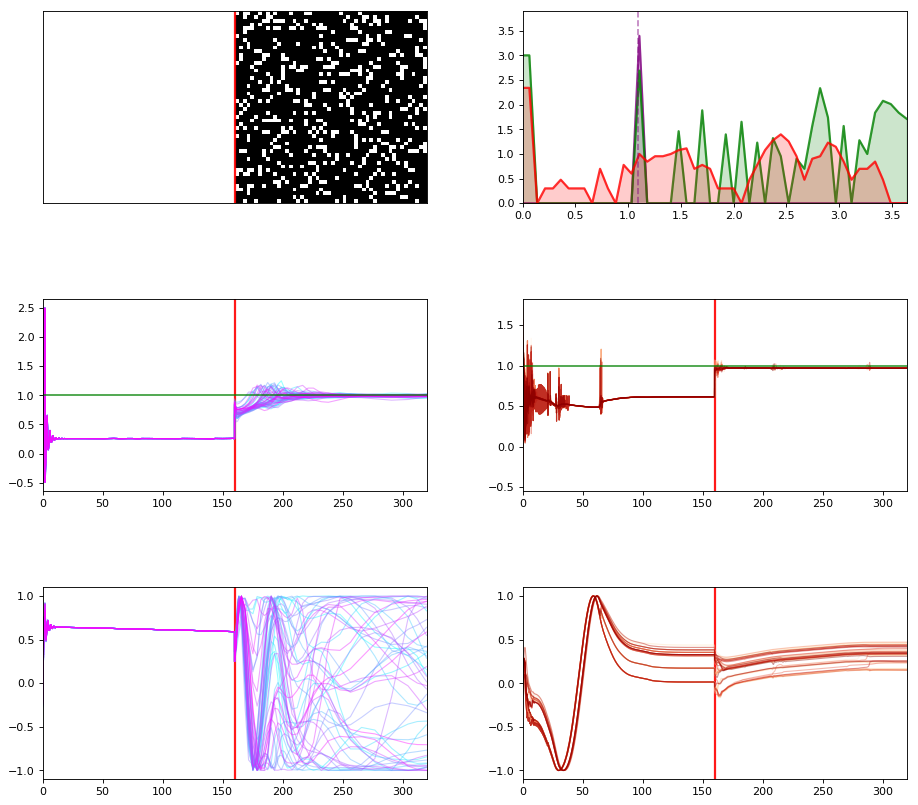

In [14]:
fig, ax = plt.subplots(6, figsize=(12,12), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)
ax[3].set_position(bbox3)
ax[4].set_position(bbox4)
ax[5].set_position(bbox5)

# Figure A
ax[0].imshow(1-AA0, cmap='Greys')
ax[0].axvline(x=N-1/2, **line_opts2)
ax[0].set_xticks([])
ax[0].set_yticks([])

# Figure B
ax[1].fill_between(tau_hist_p0, c_hist_p0, y2=0, alpha=hist_alpha, color=colours[0], zorder=0)
ax[1].plot(tau_hist_p0, c_hist_p0, zorder=0, color=colours[0], **hist_opts)
ax[1].fill_between(tau_hist_p1, c_hist_p1, y2=0, alpha=hist_alpha, color=colours[1], zorder=1)
ax[1].plot(tau_hist_p1, c_hist_p1, zorder=1, color=colours[1], **hist_opts)
ax[1].fill_between(tau_hist_p2, c_hist_p2, y2=0, alpha=hist_alpha, color=colours[2], zorder=2)
ax[1].plot(tau_hist_p2, c_hist_p2, zorder=2, color=colours[2], **hist_opts)

ax[1].axvline(x=scale(param['tau0']), color=colours[0], linestyle='dashed', alpha=0.5)
ax[1].set_xlim(left=0, right=L_dist)
ax[1].set_ylim(bottom=0, top=np.max(c_hist_p0)+0.5)

# Figure C
ax[2].set_prop_cycle(color=colorlist)
ax[2].plot(sol_np['t'], sol_np['yp'], **line_opts)
ax[2].axhline(y=param['omega0'], color='green', alpha=0.8)

# Figure D
ax[3].set_prop_cycle(color=colorlist2)
ax[3].plot(sol_p['t'], sol_p['yp'], **line_opts)
ax[3].axhline(y=param['omega0'], color='green', alpha=0.8)

# Figure E
ax[4].set_prop_cycle(color=colorlist)
phi_np = np.concatenate((arr_phases_np1, arr_phases_np2))
ax[4].plot(sol_np['t'], np.sin(phi_np), **line_opts)

# Figure F
ax[5].set_prop_cycle(color=colorlist2)
phi_p = np.concatenate((arr_phases_p1, arr_phases_p2))
ax[5].plot(sol_p['t'], np.sin(phi_p), **line_opts)

# Add injury line
ax[2].axvline(x=param['t_inj'], zorder=-1, **line_opts2)
ax[3].axvline(x=param['t_inj'], zorder=-1, **line_opts2)
ax[4].axvline(x=param['t_inj'], zorder=-1, **line_opts2)
ax[5].axvline(x=param['t_inj'], zorder=-1, **line_opts2)

# Adjustments to axes
t0 = 0
tf = param['tf']
ax[2].set_xlim(left=t0, right=tf)
ax[3].set_xlim(left=t0, right=tf)
ax[4].set_xlim(left=t0, right=tf)
ax[5].set_xlim(left=t0, right=tf)

print(param)
print(gain_p)

## Status

In [15]:
# Frequencies
print('Est. frequency no plasticity pre-injury: ' + str(asy_Omega_np1))
print('Est. frequency no plasticity post-injury: ' + str(asy_Omega_np2))
print('Est. frequency with plasticity pre-injury: ' + str(asy_Omega_p1))
print('Est. frequency with plasticity post-injury: ' + str(asy_Omega_p2) + '\n')

# Phases
print('Est. phase var no plasticity pre-injury: ' + str(delta2_np1))
print('Est. phase var no plasticity post-injury: ' + str(delta2_np2))
print('Est. phase var with plasticity pre-injury: ' + str(delta2_p1))
print('Est. phase var with plasticity post-injury: ' + str(delta2_p2) + '\n')

# Frequency asymptotic errors
print('Err. frequency no plasticity pre-injury: ' + str(Omega_var_np1))
print('Err. frequency no plasticity post-injury: ' + str(Omega_var_np2))
print('Err. frequency with plasticity pre-injury: ' + str(Omega_var_p1))
print('Err. frequency with plasticity post-injury: ' + str(Omega_var_p2) + '\n')

print('Err. phases no plasticity pre-injury: ' + str(phase_var_np1))
print('Err. phases no plasticity post-injury: ' + str(phase_var_np2))
print('Err. phases with plasticity pre-injury: ' + str(phase_var_p1))
print('Err. phases with plasticity post-injury: ' + str(phase_var_p2) + '\n')

Est. frequency no plasticity pre-injury: 0.2589379820051794
Est. frequency no plasticity post-injury: 0.9909531355790148
Est. frequency with plasticity pre-injury: 0.6144135758109339
Est. frequency with plasticity post-injury: 0.9681967839887143

Est. phase var no plasticity pre-injury: 1.232595164407831e-32
Est. phase var no plasticity post-injury: 3.663358610486611
Est. phase var with plasticity pre-injury: 0.0247990093557988
Est. phase var with plasticity post-injury: 0.010011795232030081

Err. frequency no plasticity pre-injury: 2.4772208528660044e-06
Err. frequency no plasticity post-injury: 0.00028449614392683347
Err. frequency with plasticity pre-injury: 7.621886486510361e-10
Err. frequency with plasticity post-injury: 8.537757787499768e-09

Err. phases no plasticity pre-injury: 3.1036323571796966e-05
Err. phases no plasticity post-injury: 0.024051290475738726
Err. phases with plasticity pre-injury: 1.3002081502567505e-08
Err. phases with plasticity post-injury: 1.69163720590598

In [16]:
np.var(np.mod(phi_np[-1], 2*pi))

3.489924590062696

In [17]:
asy_Omega_np1, asy_Omega_np2

(0.2589379820051794, 0.9909531355790148)

In [18]:
sol_np1['t'].size + sol_np2['t'].size

257

In [19]:
sol_np['t'].size

257